Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.7692 - loss: 0.6764 - val_accuracy: 0.8146 - val_loss: 0.5007
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.8591 - loss: 0.3975 - val_accuracy: 0.8590 - val_loss: 0.3922
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.8710 - loss: 0.3604 - val_accuracy: 0.8639 - val_loss: 0.3738
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.8810 - loss: 0.3281 - val_accuracy: 0.8673 - val_loss: 0.3662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8850 - loss: 0.3111 - val_accuracy: 0.8694 - val_loss: 0.3580
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.8901 - loss: 0.2992 - val_accuracy: 0.8709 - val_loss: 0.3534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8933 - loss: 0.2844 - val_accuracy: 0.8805 - val_loss: 0.3356
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.8986 -

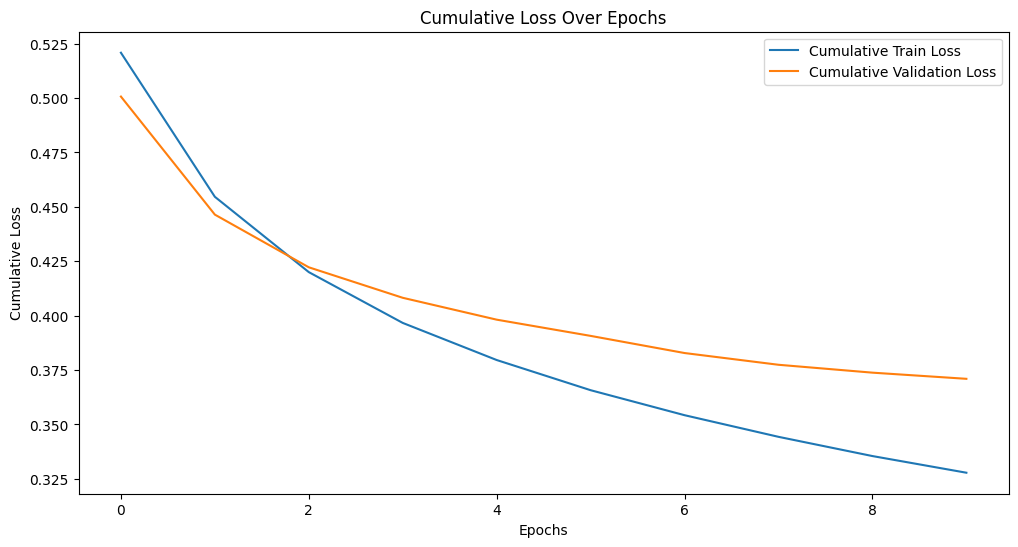

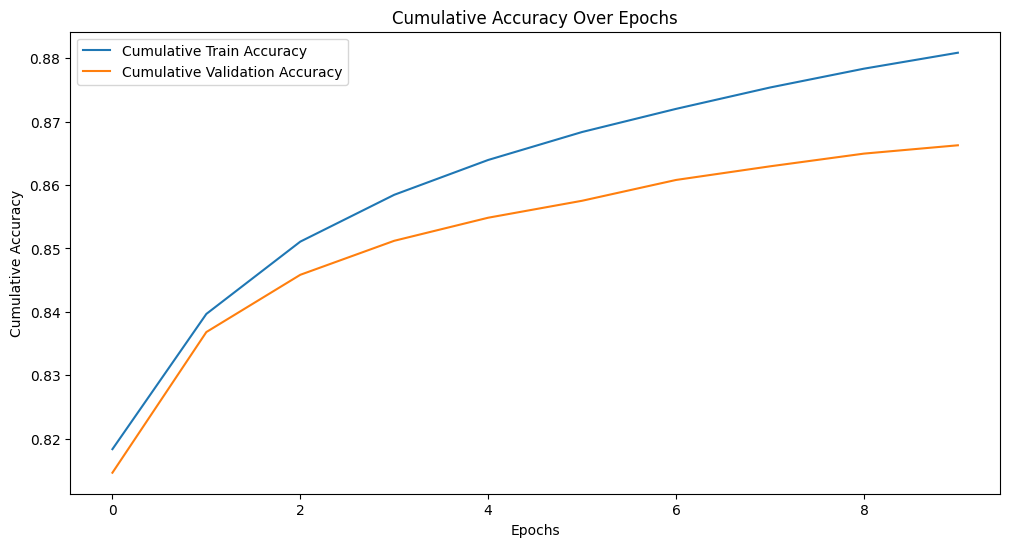

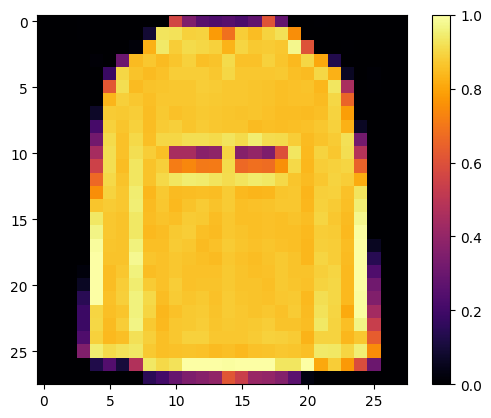

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.AveragePooling1D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

# Extract the loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Calculate cumulative loss and accuracy
cumulative_train_loss = np.cumsum(train_loss) / np.arange(1, len(train_loss) + 1)
cumulative_train_accuracy = np.cumsum(train_accuracy) / np.arange(1, len(train_accuracy) + 1)
cumulative_val_loss = np.cumsum(val_loss) / np.arange(1, len(val_loss) + 1)
cumulative_val_accuracy = np.cumsum(val_accuracy) / np.arange(1, len(val_accuracy) + 1)

# Plot cumulative loss
plt.figure(figsize=(12, 6))
plt.plot(cumulative_train_loss, label='Cumulative Train Loss')
plt.plot(cumulative_val_loss, label='Cumulative Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cumulative Loss')
plt.legend()
plt.title('Cumulative Loss Over Epochs')
plt.show()

# Plot cumulative accuracy
plt.figure(figsize=(12, 6))
plt.plot(cumulative_train_accuracy, label='Cumulative Train Accuracy')
plt.plot(cumulative_val_accuracy, label='Cumulative Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Cumulative Accuracy')
plt.legend()
plt.title('Cumulative Accuracy Over Epochs')
plt.show()

# Display a sample image
plt.imshow(test_images[98], cmap='inferno')
plt.colorbar()
plt.grid(False)
plt.show()
